In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('heart_unsorted2.csv')

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [27]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [28]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

In [29]:
model = DecisionTreeClassifier()
model.fit(trainX, trainy)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [19]:
y_score = model.predict_proba(testX)[:,-1]

In [21]:
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
average_precision = average_precision_score(testy, y_score)

print('Average precision-recall score Decision Tree: {}'.format(average_precision))

Average precision-recall score Logistic Regression: 0.8980352647045959


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.90')

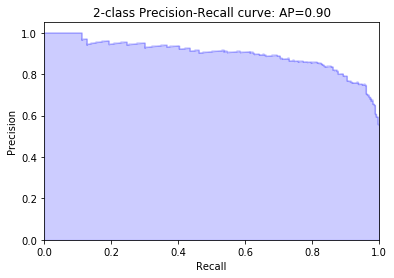

In [22]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(testy, y_score)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
